In [1]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

os.chdir('/srv/host/src/')

import simulation
from plots import *

criterion = 'drift'
design    = 'ttest'

# Note to self, consider saving pickle with P and T vectors embedded in filename

# Load the simulation control object from cache
s = pickle.load(open(f'../cache/{criterion}_{design}.pkl', 'rb'))
#s = pickle.load(open(f'../cache/{criterion}_{design}_small.pkl', 'rb'))

print(s.shape)

(5, 5)


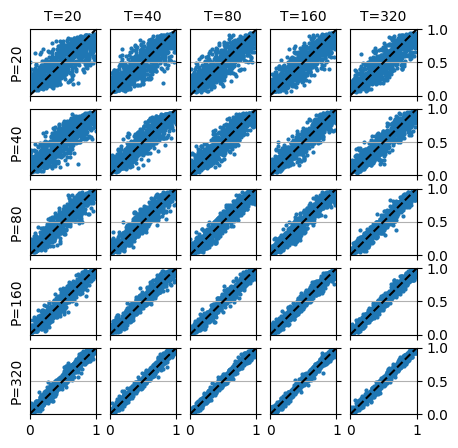

In [2]:
parameter = "betaweight"
    
fig, axes = plt.subplots(s.shape[0], s.shape[1], figsize=(5,5))

for i in range(s.shape[0]):
    for j in range(s.shape[1]):
        #print(f'{parameter}[{i},{j}]')
        biasplot(s, parameter, i, j, axes[i,j])

#plt.savefig(f'../figures/{design}_{criterion}.eps', format='eps', bbox_inches='tight')

plt.show()


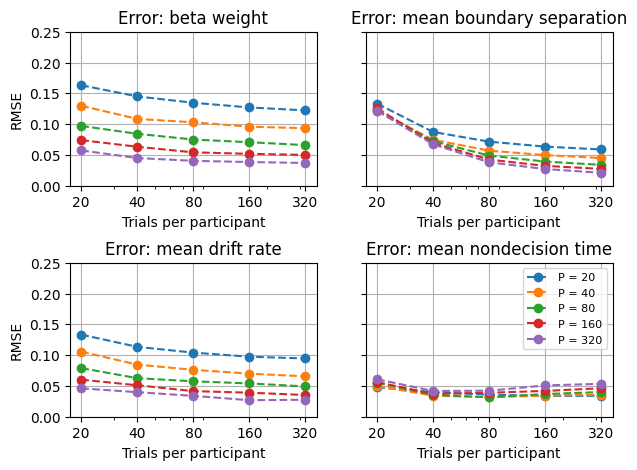

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(7, 5))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

for i, par in enumerate([("betaweight","beta weight"),
                         ("bound_mean","mean boundary separation"),
                         ("drift_mean","mean drift rate"),
                         ("nondt_mean","mean nondecision time")]):
    rmseplot(s, par[0], axes[i//2,i%2], title=par[1], axlbl=i%2)

axes[1,1].legend(loc="upper right", prop={'size': 8})

#plt.savefig(f'../figures/{design}_{criterion}_rmse.eps', format='eps', bbox_inches='tight')

plt.show()
